<a href="https://colab.research.google.com/github/Mayank1911/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Mayank_Sawant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Mayank Sawant


# **Project Summary -**

A typical taxi company faces a common problem of efficiently assigning the cabs to passengers so that the service is smooth and hassle free. One of main issue is determining the duration of the current trip so it can predict when the cab will be free for the next trip.

Machine learning has been of significant help as it has helped businesses in abundant ways. We will use Machine Learning to efficiently build a model with a real-world dataset of Yellow Taxi
Service of NYC which will predict the estimated time duration of a tax trip for a given Pick up location, Drop location, Date, and Time.

Our task is to build a model that predicts the total ride duration of taxi trips in New York City. Our primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.


# **GitHub Link -**

https://github.com/Mayank1911/NYC-Taxi-Trip-Time-Prediction

# **Problem Statement**


### My task is to build a model that predicts the total ride duration of taxi trips in New York City. My primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#loading dataset
file_path = '/content/gdrive/My Drive/NYC Taxi Trip Time Prediction - Mayank Sawant/NYC Taxi Data.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
#first five rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
#checking dataset shape
df.shape

(1458644, 11)

### Dataset Information

In [ ]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Checking for null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### What did you know about your dataset?

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


## ***2. Understanding Your Variables***

In [ ]:
#dataset description
df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


### Variables Description

* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Checking Percentile

In [ ]:
#lets see percentile from 0 to 10
for i in range(0,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
1 percentile value is 87
2 percentile value is 122
3 percentile value is 146
4 percentile value is 165
5 percentile value is 180
6 percentile value is 195
7 percentile value is 209
8 percentile value is 221
9 percentile value is 233
100 percentile value is  3526282


In [ ]:
# Setting Trip duration upper limit
df = df[df.trip_duration <= 3400]

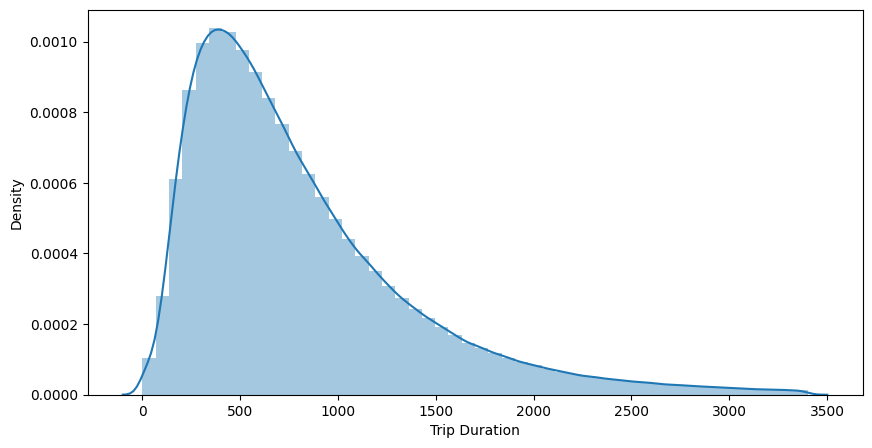

In [ ]:
#distribution plot for trip duration after setting upper limit
plt.figure(figsize = (10,5))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

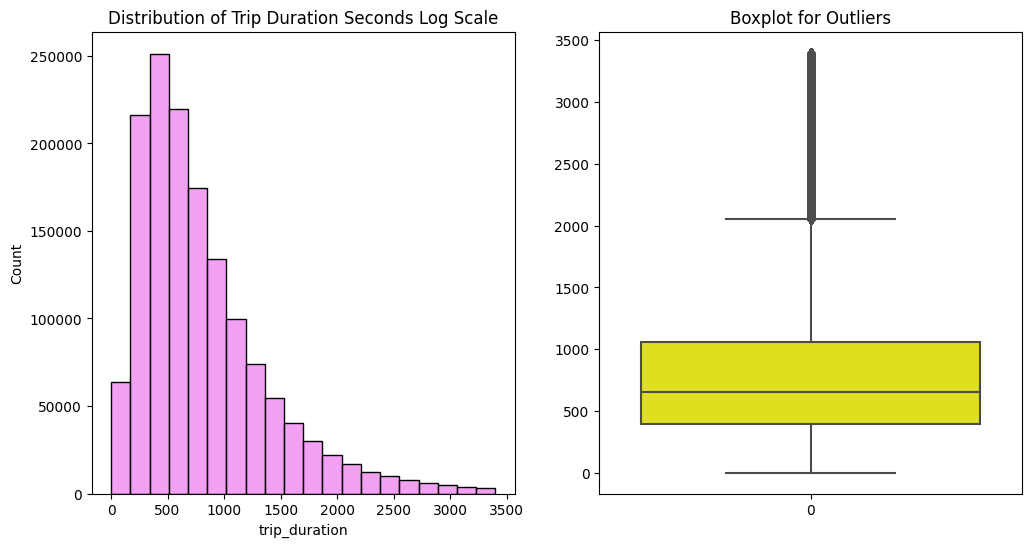

In [ ]:
#plotting trip duration distribution and boxplot for outliers
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
axes = axes.flatten()
sns.histplot(df['trip_duration'], color='violet', ax=axes[0], kde=False, bins=20)
axes[0].set_title('Distribution of Trip Duration Seconds Log Scale')
sns.boxplot(df['trip_duration'], color='yellow', ax=axes[1])
axes[1].set_title('Boxplot for Outliers')
plt.show()

##### 1. Why did you pick the specific chart?

To find the distribution of trip duration and outliers in it.

##### 2. What is/are the insight(s) found from the chart?

The distribution of trip duration is skewed to left and most of the trips are of 500 seconds i.e. around 8 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

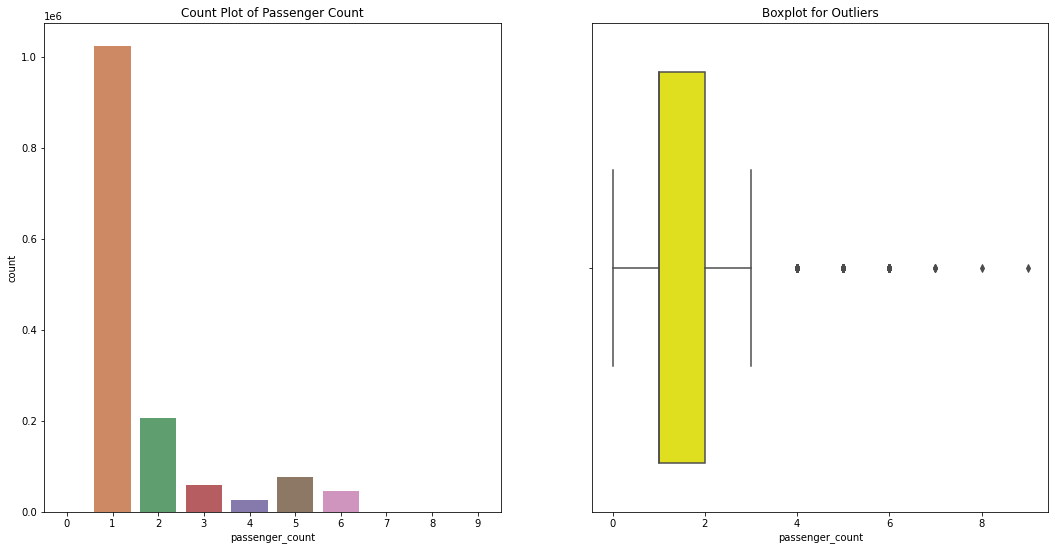

In [ ]:
#plotting passenger count and boxplot for outliers
fig, axes = plt.subplots(ncols=2, figsize=(18,9))
axes = axes.flatten()
sns.countplot(df['passenger_count'], palette = 'deep', ax=axes[0])
axes[0].set_title('Count Plot of Passenger Count')
sns.boxplot(df['passenger_count'], color='yellow', ax=axes[1])
axes[1].set_title('Boxplot for Outliers')
plt.show()

In [ ]:
#explore the passenger count and their numbers of trips
no_of_passenger = df['passenger_count'].value_counts().reset_index()
no_of_passenger.rename(columns={'index':'no_of_passenger', 'passenger_count':'trip_counts'})

,no_of_passenger,trip_counts
0,1,1023736
1,2,207556
2,5,77174
3,3,59183
4,6,47755
5,4,27989


##### 1. Why did you pick the specific chart?

To visualize the count passengers in taxi trips in NYC.

##### 2. What is/are the insight(s) found from the chart?

Single passenger trips holds the highest amount of Taxi trips. New Yorker’s rarely travel in groups.
**Rows having 0, 7, 8, 9 passengers are outliers.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
#Removing 0 and more than 6 passenger
df = df[df['passenger_count'] != 0]
df = df[df['passenger_count']<=6]

In [ ]:
#extracting day, month, date, hour, mins, weekday from datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

df['dropoff_min'] = df['dropoff_datetime'].dt.minute

Text(0.5, 1.0, 'Monthly Trips')

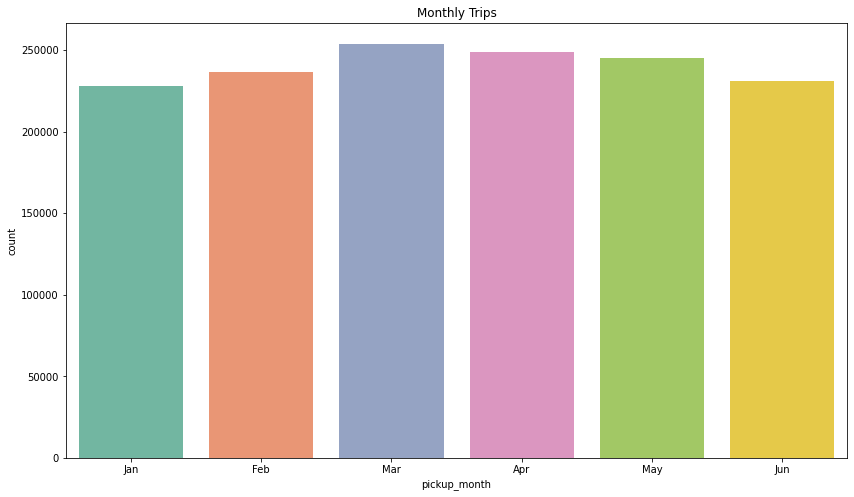

In [ ]:
#plotting monthly trips
plt.figure(figsize=(14,8))
sns.countplot(df['pickup_month'], palette='Set2')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','Mar','Apr','May','Jun'])
plt.title('Monthly Trips')

##### 1. Why did you pick the specific chart?

To visualize taxi trips over the first half of the year.

##### 2. What is/are the insight(s) found from the chart?

Month March crosses the 25k mark with the most number of trips in first-half of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'Pickup Hour')

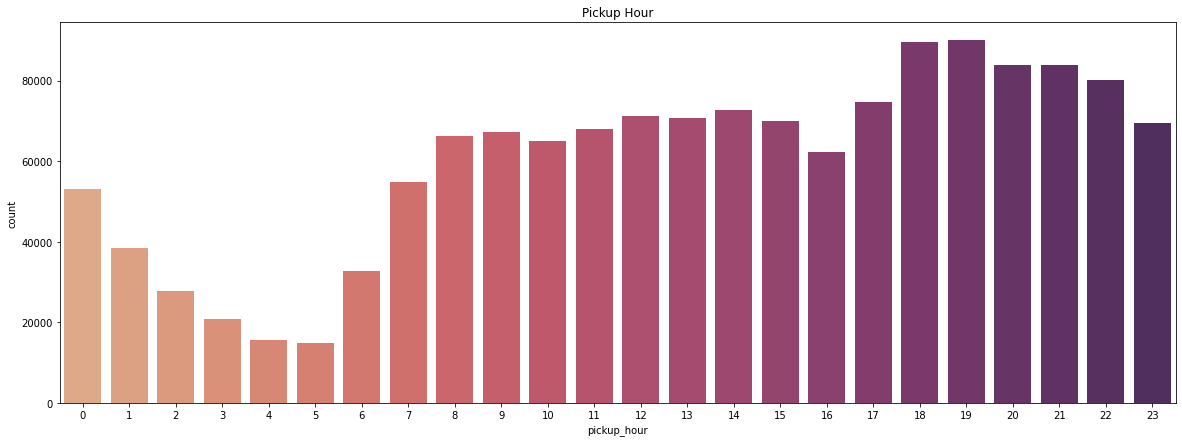

In [ ]:
#plotting pickup hour
plt.figure(figsize=(20,7))
sns.countplot(df['pickup_hour'], palette='flare')
plt.title('Pickup Hour')

##### 1. Why did you pick the specific chart?

To visualize which are the busiest pickup hour during the day.

##### 2. What is/are the insight(s) found from the chart?

People prefer taking an taxi more after daylight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0.5, 1.0, 'Weekday Trips')

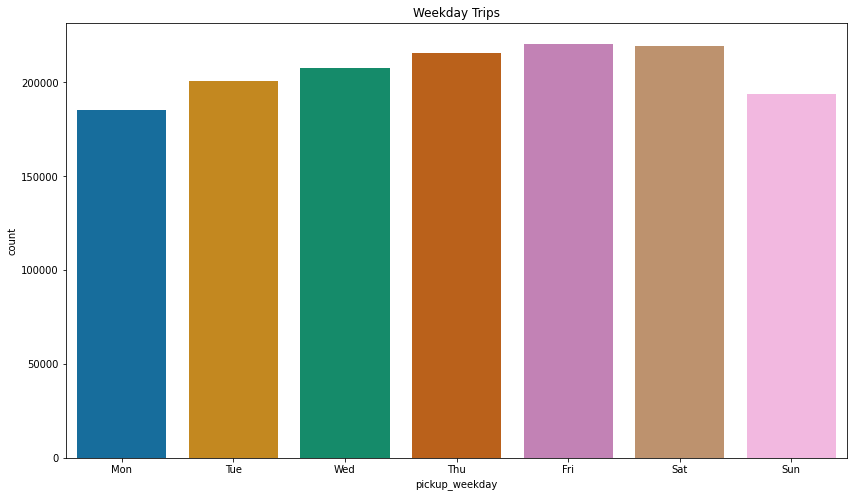

In [ ]:
#plotting weekday trips
plt.figure(figsize=(14,8))
sns.countplot(df['pickup_weekday'], palette='colorblind')
plt.xticks([0,1,2,3,4,5,6], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Weekday Trips')

##### 1. Why did you pick the specific chart?

To visualize popular pickup days during the week.

##### 2. What is/are the insight(s) found from the chart?

New Yorker’s prefer going out on Friday and Saturday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'Daily Trips')

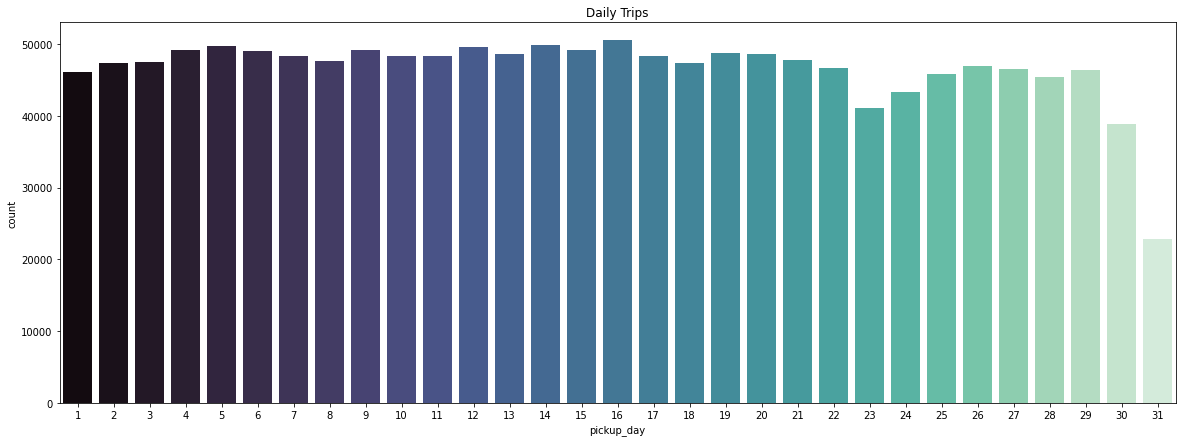

In [ ]:
#plotting daily trips
plt.figure(figsize=(20,7))
sns.countplot(df['pickup_day'], palette='mako')
plt.title('Daily Trips')

##### 1. Why did you pick the specific chart?

To visualize busiest pickup dates over the month.

##### 2. What is/are the insight(s) found from the chart?

Seems like New Yorker’s do not prefer to get a Taxi on Month-Ends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

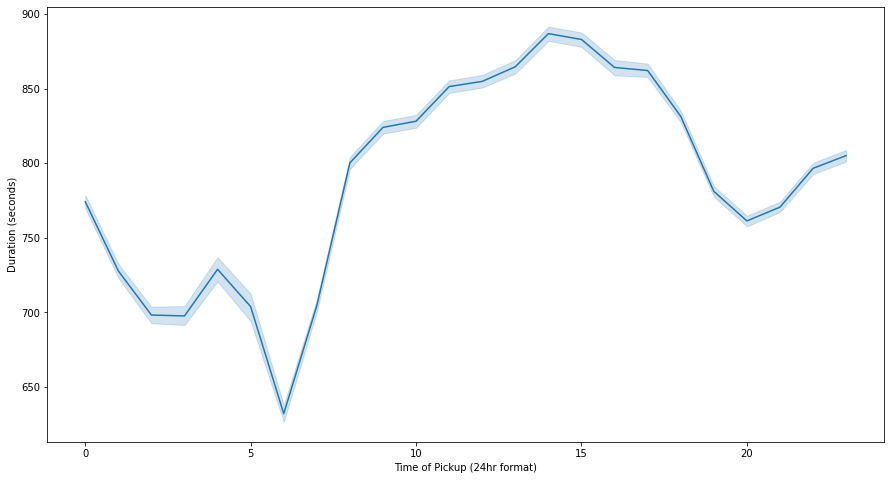

In [ ]:
#plotting line chart of Trip Duration per hour
plt.figure(figsize = (15,8))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize busiest time of pickup during 24 hours of the day.

##### 2. What is/are the insight(s) found from the chart?

Around 3pm trip duration is high, NYC’s heavy traffic could be the reason.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

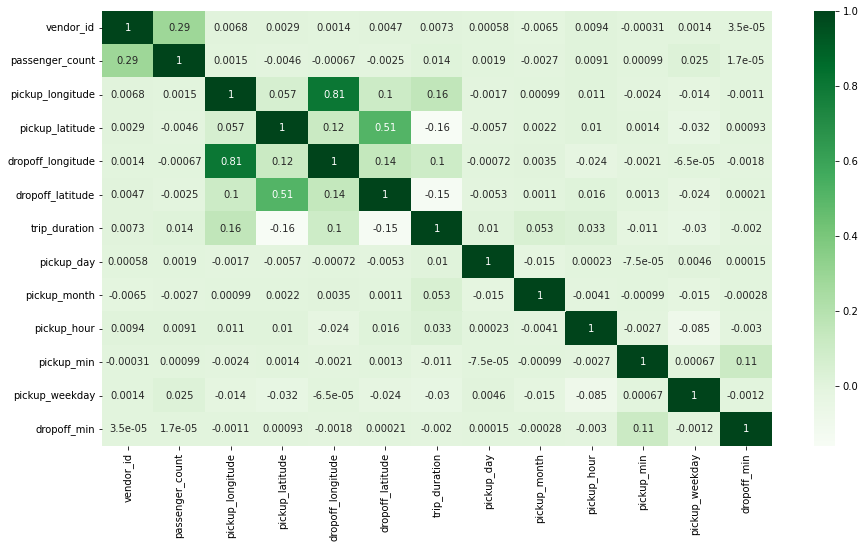

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='Greens')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Dropping Unnecessary features

In [ ]:
#dropping unnecessary columns
nyctaxidf = df.drop(['pickup_datetime','dropoff_datetime','pickup_date','id'], axis=1)
nyctaxidf.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,17,24,0,32
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,0,43,6,54
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,11,35,1,10
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,4,19,32,2,39
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,3,13,30,5,38


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Label encoding categorical features
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
nyctaxidf['vendor_id'] = enc.fit_transform(df['vendor_id'])
nyctaxidf['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
nyctaxidf.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
#implementing pca
from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyctaxidf.columns)-1)
pca.fit_transform(finaldf)
var_rat = pca.explained_variance_ratio_
var_rat

In [ ]:
#plotting pca results
plt.figure(figsize=(10,7))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="grey")

At 12th component our PCA model seems to go Flat without explaining much of a Variance.

In [ ]:
#plotting elbow plot
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

By looking at the Elbow plot, 12 is likely to be the required number of components.

In [ ]:
#applying pca as per required components
pca = PCA(n_components=12)
transform = pca.fit_transform(finaldf)
pca.explained_variance_

In [ ]:
#importance of features in particular principal component
plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(finaldf.columns)), finaldf.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

Above plot gives us detailed ideology of which feature has contributed more or less to our each Principal Component. Principal Components are our new features which consists of Information from every other original Feature we have. We reduce the Dimensions using PCA by retaining as much as Information possible.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA

### 8. Data Splitting

In [ ]:
#creating independent and dependent dataframes
X = nyctaxidf.drop(['trip_duration'], axis = 1)
y = nyctaxidf['trip_duration']

### 6. Data Scaling

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

cols = X.columns

ss = StandardScaler()
finaldf = ss.fit_transform(X)
finaldf = pd.DataFrame(finaldf, columns=cols)
finaldf.head()

### 7. PCA

In [ ]:
#implementing pca
from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyctaxidf.columns)-1)
pca.fit_transform(finaldf)
var_rat = pca.explained_variance_ratio_
var_rat

array([0.14765362, 0.1085969 , 0.10051189, 0.085563  , 0.08328991,
       0.07808904, 0.07604309, 0.07583154, 0.07012004, 0.06830237,
       0.0542184 , 0.03730898, 0.01447121])

<BarContainer object of 13 artists>

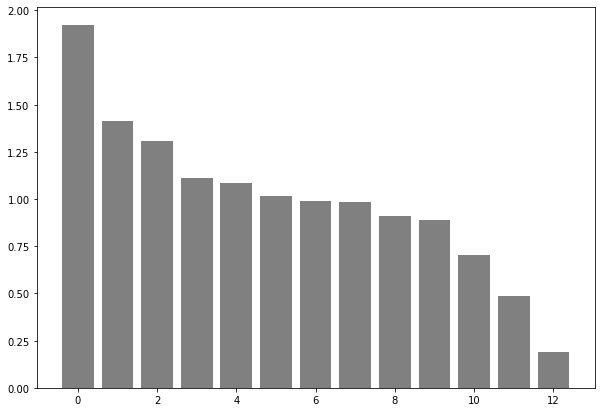

In [ ]:
#plotting pca results
plt.figure(figsize=(10,7))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="grey")

At 12th component our PCA model seems to go Flat without explaining much of a Variance.

Text(0.5, 1.0, 'Elbow Plot')

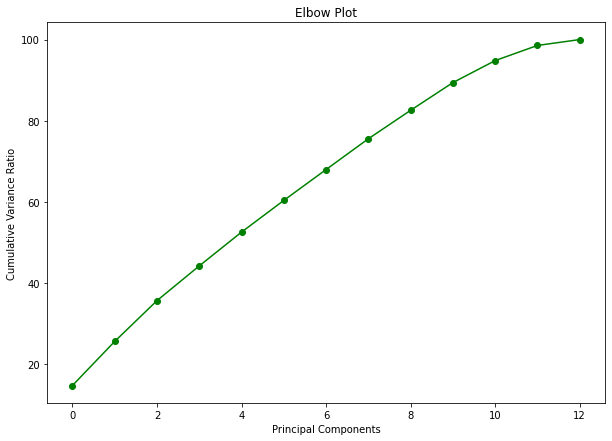

In [ ]:
#plotting elbow plot
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

By looking at the Elbow plot, 12 is likely to be the required number of components.

In [ ]:
#applying pca as per required components
pca = PCA(n_components=12)
transform = pca.fit_transform(finaldf)
pca.explained_variance_

array([1.91949833, 1.41176064, 1.30665551, 1.11231981, 1.0827696 ,
       1.01515827, 0.98856087, 0.98581069, 0.9115612 , 0.88793142,
       0.70483973, 0.48501702])

Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

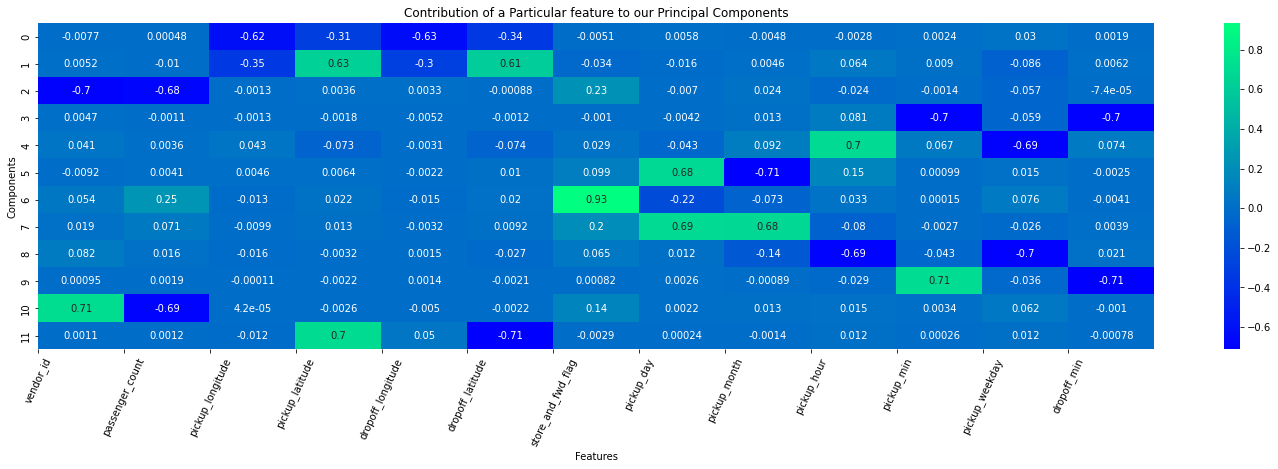

In [ ]:
#importance of features in particular principal component
plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(finaldf.columns)), finaldf.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

Above plot gives us detailed ideology of which feature has contributed more or less to our each Principal Component. Principal Components are our new features which consists of Information from every other original Feature we have. We reduce the Dimensions using PCA by retaining as much as Information possible.

In [ ]:
X = transform

In [ ]:
# importing some libraries and train test spliting

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1010375, 12), (433018, 12), (1010375,), (433018,))

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# performing linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([996.62362207, 928.49189862, 855.21976318, ..., 727.63784904,
       693.48590825, 864.73351569])

In [ ]:
#linear regression score
lr_train_score = lr.score(X_train, y_train)
print ("Training Score : " , lr_train_score)
lr_test_score = lr.score(X_test, y_test)
print ("Validation Score : ", lr_test_score)
lr_mse = mean_squared_error(y_test, lr_pred)
print ("MSE : ", lr_mse)
lr_r2 = r2_score(lr_pred, y_test)
print ("R2_Score : ", lr_r2)
lr_adj_r2 = 1-(1-r2_score((y_test), (lr_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print ("Adjusted R2_Score : ", lr_adj_r2)

Training Score :  0.06338610423883762
Validation Score :  0.05785797506531265
MSE :  309781.1573457921
R2_Score :  -12.2857940368847
Adjusted R2_Score :  0.057831865195220544


Text(0.5, 1.0, 'Test VS Prediction')

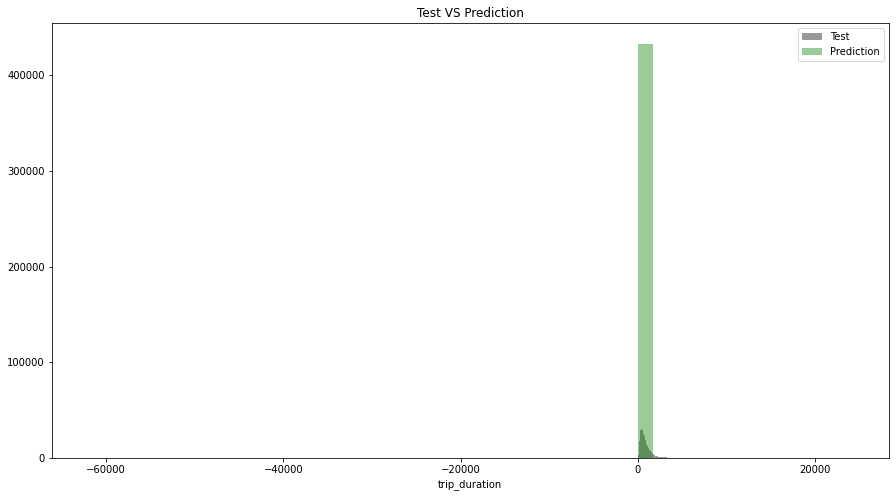

In [ ]:
#plotting test vs precdiction graph
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We can clearly see Linear Regression is not well suited for this data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#performing decision tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred

array([1259.91836735, 1797.81025641,  477.68664589, ...,  718.79001304,
        742.63657679,  723.76664116])

In [ ]:
#decision tree results
dt_train_score = dt.score(X_train, y_train)
print ("Training Score : " , dt_train_score)
dt_test_score = dt.score(X_test, y_test)
print ("Validation Score : ", dt_test_score)
dt_mse = mean_squared_error(y_test, dt_pred)
print ("MSE : ", dt_mse)
dt_r2 = r2_score(dt_pred, y_test)
print ("R2_Score : ", dt_r2)
dt_adj_r2 = 1-(1-r2_score((y_test), (dt_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print ("Adjusted R2_Score : ", dt_adj_r2)

Training Score :  0.9965277208631584
Validation Score :  0.995887707289741
MSE :  1352.1430542460023
R2_Score :  0.995873079059496
Adjusted R2_Score :  0.9958875933245154


Text(0.5, 1.0, 'Test VS Prediction')

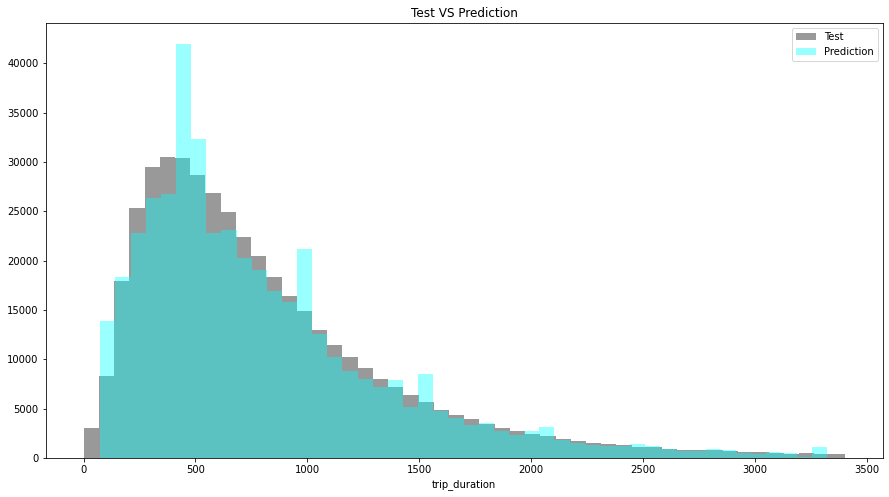

In [ ]:
#plotting test vs precdiction graph
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Decision Tree has performed well has compared to Linear Regression.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
#performing random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([1261.90407417, 1795.62401588,  477.93992734, ...,  719.17557952,
        739.24115047,  741.01954239])

In [ ]:
#random forest results
rf_train_score = rf.score(X_train, y_train)
print ("Training Score : " , rf_train_score)
rf_test_score = rf.score(X_test, y_test)
print ("Validation Score : ", rf_test_score)
rf_mse = mean_squared_error(y_test, rf_pred)
print ("MSE : ", rf_mse)
rf_r2 = r2_score(rf_pred, y_test)
print ("R2_Score : ", rf_r2)
rf_adj_r2 = 1-(1-r2_score((y_test), (rf_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print ("Adjusted R2_Score : ", rf_adj_r2)

Training Score :  0.9969706802971422
Validation Score :  0.9963927726556506
MSE :  1186.0749568191839
R2_Score :  0.9963787830742803
Adjusted R2_Score :  0.9963926726874559


Text(0.5, 1.0, 'Test VS Prediction')

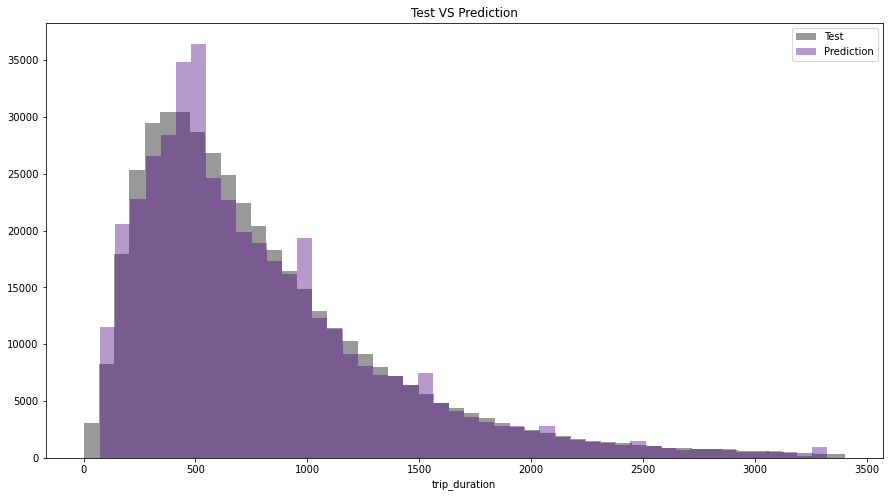

In [ ]:
##plotting test vs precdiction graph
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Random Forest has performed slightly better than Decision Trees.

### ML Model - 4

In [ ]:
#performing extra treesregressor
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(n_estimators = 2)
et.fit(X_train, y_train)
et_pred = et.predict(X_test)
et_pred

array([1260. , 1794.5,  492.5, ...,  716.5,  748.5,  785.5])

In [ ]:
#extra trees regressor
et_train_score = et.score(X_train, y_train)
print ("Training Score : " , et_train_score)
et_test_score = et.score(X_test, y_test)
print ("Validation Score : ", et_test_score)
et_mse = mean_squared_error(y_test, et_pred)
print ("MSE : ", et_mse)
et_r2 = r2_score(et_pred, y_test)
print ("R2_Score : ", et_r2)
et_adj_r2 = 1-(1-r2_score((y_test), (et_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print ("Adjusted R2_Score : ", et_adj_r2)

Training Score :  0.9999999999939697
Validation Score :  0.9969355084004122
MSE :  1007.6206445228605
R2_Score :  0.996933262480065
Adjusted R2_Score :  0.9969354234732193


Text(0.5, 1.0, 'Test VS Prediction')

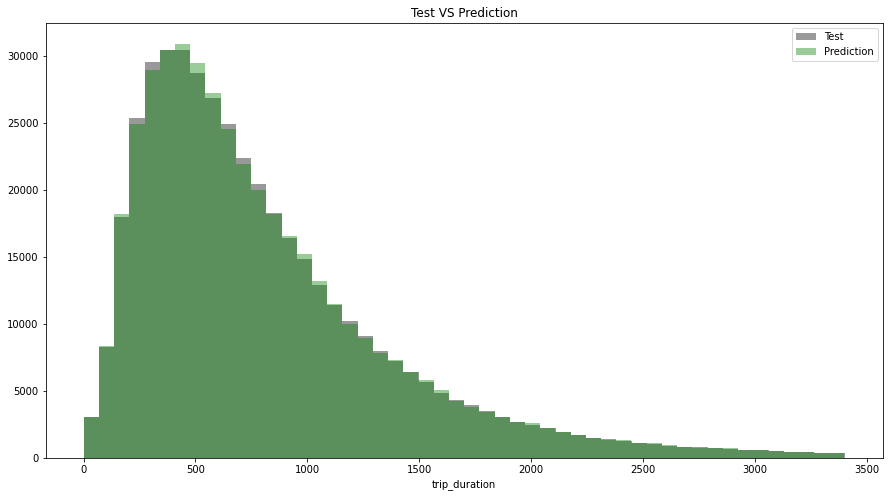

In [ ]:
#plotting test vs precdiction graph
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(et_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Extra Tress Regressor appears to be the optimal model.

### ML Model - 5

In [ ]:
#performing xgboost
from xgboost import XGBRegressor
import xgboost as xgb

xg = XGBRegressor()
xg.fit(X_train,y_train)
xg_pred = xg.predict(X_test)
xg_pred

[16:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([1255.1183 , 1870.5887 ,  478.06143, ...,  721.38983,  739.5549 ,
        788.6374 ], dtype=float32)

In [ ]:
#xgboost results
xg_train_score = xg.score(X_train, y_train)
print ("Training Score : " , xg_train_score)
xg_test_score = xg.score(X_test, y_test)
print ("Validation Score : ", xg_test_score)
xg_mse = mean_squared_error(y_test, xg_pred)
print ("MSE : ", xg_mse)
xg_r2 = r2_score(xg_pred, y_test)
print ("R2_Score : ", xg_r2)
xg_adj_r2 = 1-(1-r2_score((y_test), (xg_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print ("Adjusted R2_Score : ", xg_adj_r2)

Training Score :  0.993635858305168
Validation Score :  0.993332320747278
MSE :  2192.367330033856
R2_Score :  0.9930938469198815
Adjusted R2_Score :  0.9933321359638435


Text(0.5, 1.0, 'Test VS Prediction')

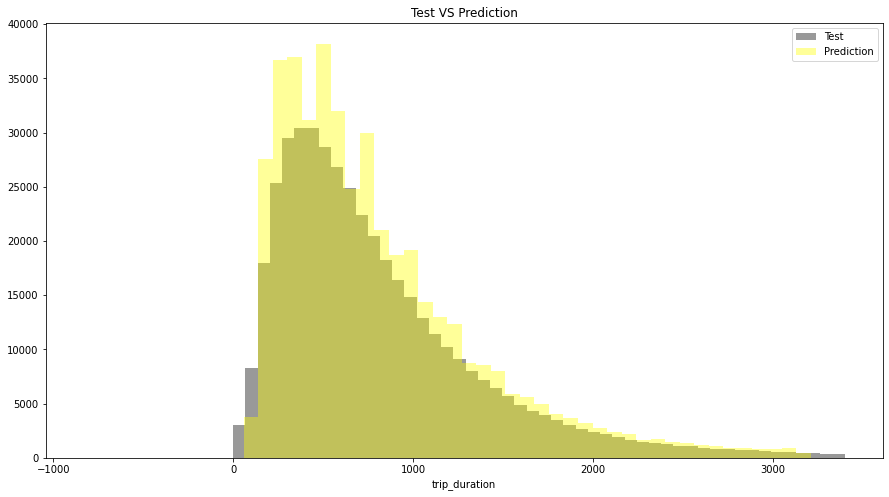

In [ ]:
#plotting test vs precdiction graph
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(xg_pred, kde=False, color="yellow", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

XGBoost seems slightly less effective than Tree Based Models.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#creating lists for every model results
models = ['Linear Regression','DecisionTree Regressor','Random Forest','Extra Trees Regressor','XGBoost Regressor']
train_score = [lr_train_score, dt_train_score, rf_train_score, et_train_score, xg_train_score]
test_score = [lr_test_score, dt_test_score, rf_test_score,et_test_score, xg_test_score]
mse = [lr_mse, dt_mse, rf_mse, et_mse, xg_mse]
r2= [lr_r2, dt_r2, rf_r2, et_r2, xg_r2]
adjusted_r2= [lr_adj_r2, dt_adj_r2, rf_adj_r2, et_adj_r2, xg_adj_r2]

In [ ]:
#creating df for results
model_comparison = pd.DataFrame({'Model Name': models,
                          'Train Score': train_score, 'Validation Score': test_score,
                          'MSE': mse,
                          'R^2': r2,
                          'Adjusted R^2': adjusted_r2})
model_comparison.sort_values(by=['MSE'])

,Model Name,Train Score,Validation Score,MSE,R^2,Adjusted R^2
3,Extra Trees Regressor,1.000000,0.996936,1007.620645,0.996933,0.996935
2,Random Forest,0.996971,0.996393,1186.074957,0.996379,0.996393
1,DecisionTree Regressor,0.996528,0.995888,1352.143054,0.995873,0.995888
4,XGBoost Regressor,0.993636,0.993332,2192.367330,0.993094,0.993332
0,Linear Regression,0.063386,0.057858,309781.157346,-12.285794,0.057832


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Extra Trees Regressor

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

-Mostly 1 or 2 passengers avail the cab.

-The instance of large group of people travelling together is rare.

-Most trips were taken on Friday and Monday being the least.

-Fridays and Saturdays are those days in a week when peoples prefer to roam in the city.

-The highest average time taken to complete a trip are for trips started in between 2 pm to 5 pm and the least are the ones taken between 5 am to 7 am.

-Linear Regression doesn’t work well on this data. The optimal model is Extra Trees Regressor.